# Homework 2

In [0]:
import torch
import numpy as np
import time

In [0]:
N = 100
P = 1000
D = 2000
X = np.random.rand(N,D) #100 x 2000
T = np.random.rand(P,D) #1000 x 2000

In [0]:
def for_loop_rbf(X,T,gamma=1):
    n = X.shape[0]
    p = T.shape[0]
    d = X.shape[1]

    rbf = np.zeros(shape=(n,p))
    start = time.time()
    print(np.subtract(X[2,:],T[3,:]).shape)
    for i in range(n):
        for j in range(p):
            numerator = np.sqrt(np.square(np.linalg.norm(np.subtract(X[i,:],T[j,:]))))
            rbf[i,j] = np.exp(np.divide(numerator,-gamma))

    stop = time.time()
    total_time = stop - start

    return rbf, round(total_time,1)
rbf, tot_time = for_loop_rbf(X,T)

print("Total time taken:",tot_time,"s")
print(rbf[:3,:3])

(2000,)
Total time taken: 1.9 s
[[1.79508954e-08 1.16139934e-08 1.51045089e-08]
 [1.05881158e-08 9.70006543e-09 8.51524263e-09]
 [1.59035420e-08 1.16770629e-08 1.34934173e-08]]


In [0]:
def np_broadcast(X,T,gamma=1):
    n = X.shape[0]
    p = T.shape[0]
    d = X.shape[1]

    resized_x = np.reshape(X,(n,1,d))
    resized_t = np.reshape(T,(1,p,d))
    start = time.time()
    intermediate = np.subtract(resized_x,resized_t)
    intermediate = np.square(intermediate)
    numerator = np.sum(intermediate,axis=-1)
    rbf = np.exp(np.divide(numerator,-gamma))
    stop = time.time()

    total_time = stop - start

    return rbf, total_time

rbf, total_time = np_broadcast(X,T)

print("Total time taken:",total_time,"s")
print(rbf[:3,:3])

Total time taken: 1.3437442779541016 s
[[7.02713269e-139 1.04433746e-145 1.44284731e-141]
 [3.52768536e-147 1.40252922e-148 1.12641456e-150]
 [9.21250624e-141 1.27284850e-145 2.45153008e-143]]


In [0]:
def rbf_torch(X,T,gamma=1):
    X = torch.from_numpy(X)
    T = torch.from_numpy(T)
    n = X.shape[0]
    p = T.shape[0]
    d = X.shape[1]

    resized_x = torch.unsqueeze(X,dim=1)
    resized_t = torch.unsqueeze(T,dim=0)

    start = time.time()
    intermediate = torch.add(resized_x,-resized_t)
    intermediate = intermediate.pow(2)
    summation = torch.sum(intermediate, axis=-1)
    rbf = torch.exp(torch.div(summation,-gamma))
    stop = time.time()
    total_time = stop - start
    return rbf,total_time

rbf, total_time = rbf_torch(X,T)
print("Total time taken:",total_time,"s")
print(rbf[:3,:3])

Total time taken: 1.812258243560791 s
tensor([[7.0271e-139, 1.0443e-145, 1.4428e-141],
        [3.5277e-147, 1.4025e-148, 1.1264e-150],
        [9.2125e-141, 1.2728e-145, 2.4515e-143]], dtype=torch.float64)


In [0]:
class k_means:
    def __init__(self,P,M=50):
        self.clusters = P
        self.iterations = M
        self.blob_data = 50
        self.dim = 30
        self.mu = [3,5,7,13,17]
        self.var = 0.1
        self.N = 100
        self.D = 2000

    def get_blobs(self):
        blob_list = []
        for i in range(5):
            blob_list.append(np.random.normal(self.mu[i],self.var,(50,2)))
        dataset = np.concatenate(blob_list)
        return dataset
    
    def l2_squared(self,X,T):
        
        # do row-wise distance calculation
        # resized_x = np.reshape(X,(n,1,d))
        # resized_t = np.reshape(T,(1,p,d))
        intermediate = np.subtract(X,T)
        intermediate = np.square(intermediate)
        distance = np.sum(intermediate,axis=-1)
        return distance

    def get_distance(self, data, cluster):
        min_dist = np.zeros((250,self.clusters))
        for i in range(self.clusters):
            dist_matrix = self.l2_squared(data,cluster[i])
            min_dist[:,i] = dist_matrix
        # print(min_dist.shape)
        return min_dist

    def get_kmeans(self,data):
        final_cluster = {}
        cluster_init = [data[int(i*(250/self.clusters))] for i in range(self.clusters)]
        min_dist = self.get_distance(data, cluster_init)
        new_cluster = np.zeros((self.clusters,))
        stabilised_count = 0
        #calculate all the distances between the centroid and use argmin
        for i in range(self.iterations):
            cluster_assign = np.argmin(min_dist,axis=-1)
            for i in range(self.clusters):
                mask = (cluster_assign==i)
                # print(type(data[mask]))
                clustered = data[mask]
                final_cluster[i] = data[mask]
                if len(clustered) > 1:
                    means = np.mean(clustered)
                    if np.absolute(new_cluster[i] - means) < 1e-5:
                        stabilised_count += 1
                        if stabilised_count == self.clusters:
                            return final_cluster
                    new_cluster[i] = means
            min_dist = self.get_distance(data, new_cluster)
        return final_cluster
    


        

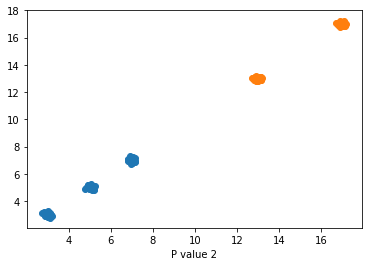

In [0]:
import matplotlib.pyplot as plt
kmeans = k_means(2)
blobs = kmeans.get_blobs()
clustered = kmeans.get_kmeans(blobs)
def dict_peek(dic):
    for key,values in dic.items():
        print(values[:3])

for i in clustered.values():
    plt.scatter(i[:,0], i[:,1])
plt.xlabel("P value 2")
plt.show()


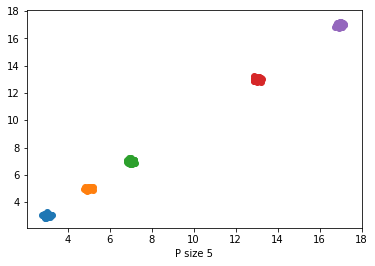

In [0]:
kmeans = k_means(5)
blobs = kmeans.get_blobs()
clustered = kmeans.get_kmeans(blobs)
for i in clustered.values():
    plt.scatter(i[:,0], i[:,1])
plt.xlabel("P size 5")
plt.show()

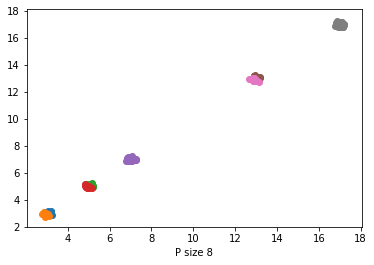

In [0]:
kmeans = k_means(8)
blobs = kmeans.get_blobs()
clustered = kmeans.get_kmeans(blobs)
for i in clustered.values():
    plt.scatter(i[:,0], i[:,1])
plt.xlabel("P size 8")
plt.show()